In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import argparse
import random
import shutil
import time
import warnings
import os
import sys
import copy

import torch
import torch.nn as nn

import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim as optim

import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import matplotlib

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  0.4.1
Torchvision Version:  0.2.2


Color list: https://matplotlib.org/2.0.0/examples/color/named_colors.html

In [2]:
pwd

'/home/by783/Self_Jupyter/DL_Final_Project'

vgg_fcadj
vgg_alladj


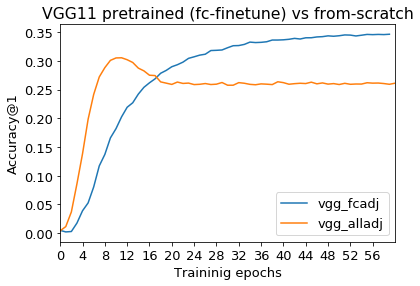

In [5]:
import re
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='/scratch/by783/DL_Final_models/'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190422_(.*?).pt_val_acc', scorefilename).group(1)
        print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
#k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

k_to_m_dict={'vgg_fcadj':'pretrained','vgg_alladj':'from-scratch'}

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k)#_to_m_dict[k])
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 60, 4.0))
plt.xlim([0,60])
plt.xlabel('Traininig epochs')
plt.title('VGG11 pretrained (fc-finetune) vs from-scratch')
plt.legend()
plt.show()

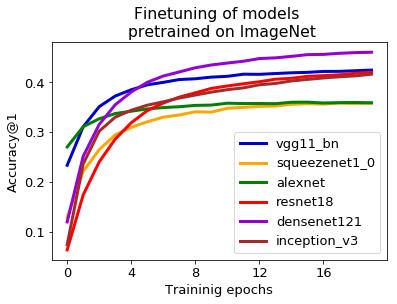

In [6]:
matplotlib.rcParams.update({'font.size': 13})
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='../DL_Final_Project_Models'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190421_raw_(.*?).pt_val_acc', scorefilename).group(1)
        #print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

color_list=['mediumblue','orange','green','red','darkviolet','brown']
c_code=0

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),net_score_dict[k],label=k_to_m_dict[k],color=color_list[c_code],linewidth=3)
    c_code+=1
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 20, 4.0))
plt.xlabel('Traininig epochs')
plt.title('Finetuning of models \n pretrained on ImageNet')
plt.legend()
plt.show()

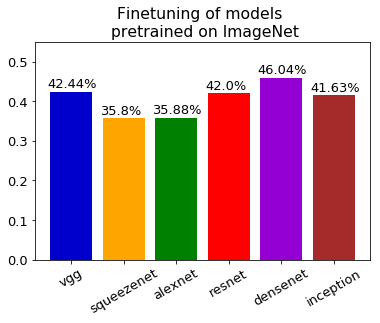

In [7]:
len(net_score_dict)
key_lst=net_score_dict.keys()
final_score_list=[net_score_dict[key][-1] for key in key_lst]


plt.bar(range(6),final_score_list,tick_label =list(key_lst) ,color=['mediumblue','orange','green','red','darkviolet','brown'])
plt.title('Finetuning of models \n pretrained on ImageNet')
plt.xticks(rotation=30)
plt.ylim([0,0.55])

for i, v in enumerate(final_score_list):
    plt.text(list(range(6))[i] - 0.45, v + 0.01, str(v*100)[:5]+'%')

plt.show()

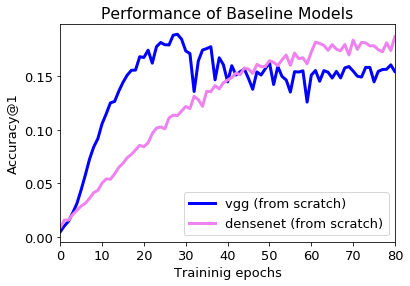

In [11]:
scorefilepath='/beegfs/by783/DL_Final_models'
scorefilename= '190509_vgg_raw.pt_val_acc'
with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
vgg_raw_score= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content]
scorefilepath='/beegfs/by783/DL_Final_models'
scorefilename= '190506_main_densenet_fscr_hflip.pt_val_acc'
with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
densenet_raw_score= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content]


plt.plot(range(len(vgg_raw_score)),vgg_raw_score,label='vgg (from scratch)',color='blue',linewidth=3)#_to_m_dict[k])
plt.plot(range(len(densenet_raw_score)),densenet_raw_score,label='densenet (from scratch)',color='violet',linewidth=3)
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 81, 10.0))
plt.xlim([0,80])
plt.xlabel('Traininig epochs')
plt.title('Performance of Baseline Models')
plt.legend()
plt.show()

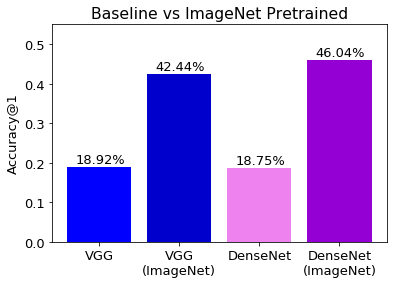

In [10]:
raw_vs_INPretrained_list = ['VGG','VGG\n(ImageNet)','DenseNet','DenseNet\n(ImageNet)']
raw_vs_INPretrained_scores = [max(vgg_raw_score),0.4244,max(densenet_raw_score),0.4604]
plt.bar(range(4),raw_vs_INPretrained_scores,tick_label =raw_vs_INPretrained_list ,color=['blue','mediumblue','violet','darkviolet'])
plt.title('Baseline vs ImageNet Pretrained')
for i, v in enumerate(raw_vs_INPretrained_scores):
    plt.text(list(range(4))[i] - 0.3, v + 0.01, str(v*100)[:5]+'%')
plt.ylim([0,0.55])
plt.ylabel('Accuracy@1')
plt.show()


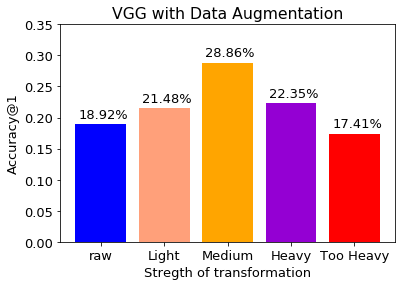

In [12]:
vgg_daug = ['raw','Light','Medium','Heavy','Too Heavy']
vgg_daug_scores = [max(vgg_raw_score),0.2148,0.2886,0.2235,0.1741]
plt.bar(range(5),vgg_daug_scores,tick_label =vgg_daug ,color=['blue','lightsalmon','orange','darkviolet','red'])
plt.title('VGG with Data Augmentation')
for i, v in enumerate(vgg_daug_scores):
    plt.text(list(range(5))[i] - 0.35, v + 0.01, str(v*100)[:5]+'%')
plt.ylim([0,0.35])
plt.ylabel('Accuracy@1')
plt.xlabel('Stregth of transformation')
plt.show()

In [13]:
max(vgg_raw_score)

0.1892

In [14]:
max(densenet_raw_score)

0.1875

vgg_fcadj
vgg_alladj


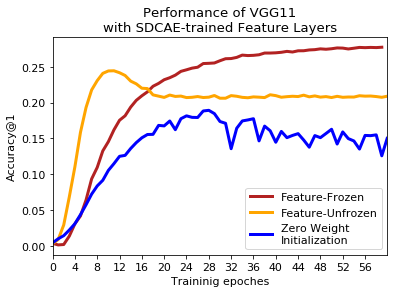

In [44]:
import re
# 12h runing
# regex
#https://stackoverflow.com/questions/32680030/match-text-between-two-strings-with-regular-expression
# read filename in a directory
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# read txt line by line
#https://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list

scorefilepath='/scratch/by783/DL_Final_models/'

net_score_dict={}

for scorefilename in os.listdir(scorefilepath):
    try:
        filenetname=re.search(r'190422_(.*?).pt_val_acc', scorefilename).group(1)
        print(filenetname)
        with open(scorefilepath+'/'+scorefilename) as f:
            content = f.readlines()
            
        #print(content)
        net_score_dict[filenetname]= [float(re.search(r"tensor\((.*?), device=\'cuda\:0\', dtype=torch.float64\)", s).group(1)) for s in content] 
        #tensor(0.4176, device='cuda:0', dtype=torch.float64)
    except:
        pass
    
#k_to_m_dict={'vgg':'vgg11_bn','squeezenet':'squeezenet1_0','resnet':'resnet18','alexnet':'alexnet','densenet':'densenet121','inception':'inception_v3'}

k_to_m_dict={'vgg_fcadj':'Feature-Frozen','vgg_alladj':'Feature-Unfrozen'}

c_count=0
color_list=['firebrick','orange']

for k in net_score_dict.keys():
    plt.plot(range(len(net_score_dict[k])),np.array(net_score_dict[k])*0.8,label=k_to_m_dict[k],color=color_list[c_count],linewidth=3)#_to_m_dict[k])
    c_count+=1
plt.plot(range(len(vgg_raw_score)),vgg_raw_score,label='Zero Weight\nInitialization',color='blue',linewidth=3)
    
plt.ylabel('Accuracy@1')
plt.xticks(np.arange(0, 60, 4.0))
plt.xlim([0,60])
plt.xlabel('Traininig epoches')
plt.title('Performance of VGG11\nwith SDCAE-trained Feature Layers')
plt.legend()
plt.show()

In [16]:
scorefilepath='/scratch/by783/DL_Final_models/'


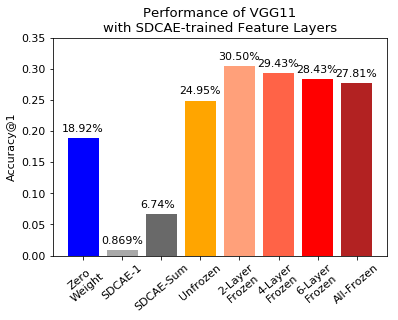

In [46]:
matplotlib.rcParams.update({'font.size': 11})
AEvgg = ['Zero\nWeight','SDCAE-1','SDCAE-Sum','Unfrozen','2-Layer\nFrozen','4-Layer\nFrozen','6-Layer\nFrozen','All-Frozen']
AEvgg_scores = [0.1892,0.0087,0.0674,0.2495,0.3051,0.2943,0.2843,0.2781]
plt.bar(range(8),AEvgg_scores,tick_label =AEvgg ,color=['blue','darkgrey','dimgrey','orange','lightsalmon','tomato','red','firebrick'])
plt.title('Performance of VGG11\nwith SDCAE-trained Feature Layers')
for i, v in enumerate(AEvgg_scores):
    plt.text(list(range(8))[i] - 0.55, v + 0.01, str(v*100)[:5]+'%')
plt.ylim([0,0.35])
plt.ylabel('Accuracy@1')
plt.xticks(rotation=40)
plt.show()